In [68]:
import fcntl
import uproot
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import concurrent.futures, multiprocessing
ncpu = multiprocessing.cpu_count()
executor = concurrent.futures.ThreadPoolExecutor(ncpu*4)

%matplotlib inline

import timeit
start_time = timeit.default_timer()

# Get data

Select file name and open through `uproot`

In [69]:
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_qcd_cyl_rad3_n100.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_gamma25_newDefault_n9000.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_ele15_n100_testhelper.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_gamma25_cyl_rad3_n100_PU.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_pi25_n100.root"
#fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/fromZiheng/CMSSW9304_partGun_PDGid22_x1000_E300.0To300.0_NTUP.root"
fname = "../InputData/hgcalNtuple_electrons_15GeV_n100.root"

tree = uproot.open(fname)["ana/hgc"]

Define variables (branches) to read from the file

In [70]:
branches = []

branches += ["genpart_gen","genpart_reachedEE","genpart_energy","genpart_eta","genpart_phi", "genpart_pid","genpart_posx","genpart_posy","genpart_posz"]

branches += ["rechit_x", "rechit_y", "rechit_z", "rechit_energy","rechit_layer", 'rechit_flags','rechit_cluster2d',
            'cluster2d_multicluster']

In [71]:
# Read and cache data
cache = {}
df = tree.pandas.df(branches, cache = cache,executor=executor)

In [72]:
df=df.rename(columns= lambda x:x.decode("utf-8"))

In [73]:
#%timeit tree.pandas.df(branches, cache = cache,executor=executor)

Look at the first 5 events

In [74]:
df[:5]

,genpart_gen,genpart_reachedEE,genpart_energy,genpart_eta,genpart_phi,genpart_pid,genpart_posx,genpart_posy,genpart_posz,rechit_x,rechit_y,rechit_z,rechit_energy,rechit_layer,rechit_flags,rechit_cluster2d,cluster2d_multicluster
0,"[1, 2, -1, -1, -1, -1, -1, -1, -1]","[2, 2, 2, 2, 2, 2, 2, 2, 2]","[45.1184, 45.1184, 39.4531, 3.30556, 1.04493, ...","[1.76612, -1.76612, -1.7664, -1.76556, 1.76688...","[1.69589, -1.4457, -1.45838, -1.62447, 1.70974...","[11, -11, 22, 22, 22, 22, 22, 22, 22]","[[-18.8752, -18.93, -19.0197, -19.0745, -19.16...","[[111.631, 111.889, 112.313, 112.571, 112.995,...","[[320.755, 321.505, 322.735, 323.485, 324.715,...","[10.6832, 12.6199, 11.2455, 12.6199, 12.6199, ...","[-115.892, -118.814, -116.866, -120.762, -116....","[-330.735, -330.735, -330.735, -330.735, -330....","[0.0127074, 0.0150606, 0.0312978, 0.00611838, ...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...","[2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, ...","[100.345, 100.345, 10.3193, 2.23278, 28.3023, ...","[2.58842, -2.58842, -2.58815, -2.58766, -2.587...","[1.49584, -1.64575, -1.65878, -1.66284, -1.664...","[11, -11, 22, 22, 22, 22, 22, 22, 22, 22, 22, ...","[[2.73072, 2.73523, 2.7426, 2.74709, 2.75443, ...","[[47.8181, 47.9313, 48.1171, 48.2303, 48.4161,...","[[320.755, 321.505, 322.735, 323.485, 324.715,...","[-7.422, -6.59733, -7.00967, -8.24667, -7.0096...","[-50.945, -50.945, -50.2308, -49.5166, -48.802...","[-330.735, -330.735, -330.735, -330.735, -330....","[0.0286782, 0.0202846, 0.020984, 0.0300771, 0....","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...","[2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2]","[53.4043, 53.4043, 5.80795, 0.423721, 0.435066...","[1.94198, -1.94198, -1.94261, -1.94272, -1.942...","[-3.09223, 0.04936, 0.0435577, 0.0286671, -0.0...","[11, -11, 22, 22, 22, 22, 22, 22, 22, 22, 11, ...","[[-93.6216, -93.8397, -94.1974, -94.4155, -94....","[[-7.92861, -7.95455, -7.99715, -8.02318, -8.0...","[[320.755, 321.505, 322.735, 323.485, 324.715,...","[93.8996, 94.4618, 93.0249, 93.3373, 95.0241, ...","[0.973892, 0.0, 0.973892, 1.94777, 2.92166, 0....","[-330.735, -330.735, -330.735, -330.735, -330....","[0.0141068, 0.291834, 0.0218655, 0.0320929, 0....","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...","[2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, ...","[95.4369, 95.4369, 59.1719, 9.19693, 49.975, 1...","[2.53733, -2.53733, -2.53763, -2.53723, -2.537...","[1.54388, -1.59771, -1.60001, -1.60034, -1.599...","[11, -11, 22, 11, -11, 22, 22, 22, 22, 22, 22,...","[[0.400555, 0.399304, 0.397232, 0.395956, 0.39...","[[50.9559, 51.0753, 51.271, 51.3904, 51.5861, ...","[[320.755, 321.505, 322.735, 323.485, 324.715,...","[-5.77267, -5.77267, -5.36034, -4.53567, -4.94...","[-53.8017, -55.2301, -53.0876, -58.801, -53.80...","[-332.915, -332.915, -332.915, -332.915, -332....","[0.0258803, 0.0440664, 0.166473, 0.0174867, 0....","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1, 2, -1, -1, -1, -1, -1, -1, -1]","[2, 2, 2, 2, 2, 2, 2, 2, 2]","[101.759, 101.759, 1.70502, 0.320024, 1.17141,...","[2.60237, -2.60237, -2.60259, -2.60246, -2.602...","[1.79301, -1.34858, -1.35281, -1.35813, -1.362...","[11, -11, 22, 22, 22, 22, 22, 22, 22]","[[-11.5171, -11.54

# Look at an event

In [75]:
event_id = 12

### Create particles data frame

In [76]:
all_particles = pd.DataFrame({name.replace('genpart_',''):df.loc[event_id,name] for name in branches if 'genpart_' in name })

In [77]:
# add pt column
all_particles['pt'] = all_particles.energy/np.cosh(all_particles.eta)

In [78]:
all_particles[:5]

,energy,eta,gen,phi,pid,posx,posy,posz,reachedEE,pt
0,57.150143,2.012478,1,-3.093405,11,"[-87.604, -87.8069, -88.1395, -88.3423, -88.67...","[-7.11594, -7.1389, -7.1766, -7.19964, -7.2374...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,15.008920
1,57.150143,-2.012478,2,0.048188,-11,"[86.6693, 86.8734, 87.2081, 87.4122, 87.7469, ...","[1.37011, 1.36696, 1.36172, 1.35849, 1.35307, ...","[-320.755, -321.505, -322.735, -323.485, -324....",2,15.008920
2,1.062125,-2.012514,-1,0.045849,22,[],[],[],0,0.278928
3,45.389442,2.013108,-1,-3.091439,22,"[-87.7428, -87.9465, -88.2806, -88.4844, -88.8...","[-4.40191, -4.41213, -4.42891, -4.43913, -4.45...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,11.913045
4,8.608773,2.015048,-1,-3.047242,22,"[-87.345, -87.5477, -87.8801, -88.0828, -88.41...","[-7.85375, -7.87293, -7.90438, -7.92356, -7.95...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,2.255258


Select particles (the ones with gen > 0 are the initial particles)

In [79]:
selected_part_ind = (all_particles.gen > -2)
selected_part_ind &= (all_particles.reachedEE > 1) 
selected_part_ind &= (all_particles.pt > 5) 
selected_part_ind &= (all_particles.eta > 0) 


particles = all_particles[selected_part_ind]

In [80]:
particles[:5]

,energy,eta,gen,phi,pid,posx,posy,posz,reachedEE,pt
0,57.150143,2.012478,1,-3.093405,11,"[-87.604, -87.8069, -88.1395, -88.3423, -88.67...","[-7.11594, -7.1389, -7.1766, -7.19964, -7.2374...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,15.008920
3,45.389442,2.013108,-1,-3.091439,22,"[-87.7428, -87.9465, -88.2806, -88.4844, -88.8...","[-4.40191, -4.41213, -4.42891, -4.43913, -4.45...","[320.755, 321.505, 322.735, 323.485, 324.715, ...",2,11.913045


In [81]:
# print Pt
particles.energy/np.cosh(particles.eta)

0    15.008920
3    11.913045
dtype: float32

In [82]:
min_lay = 0
max_lay = 55

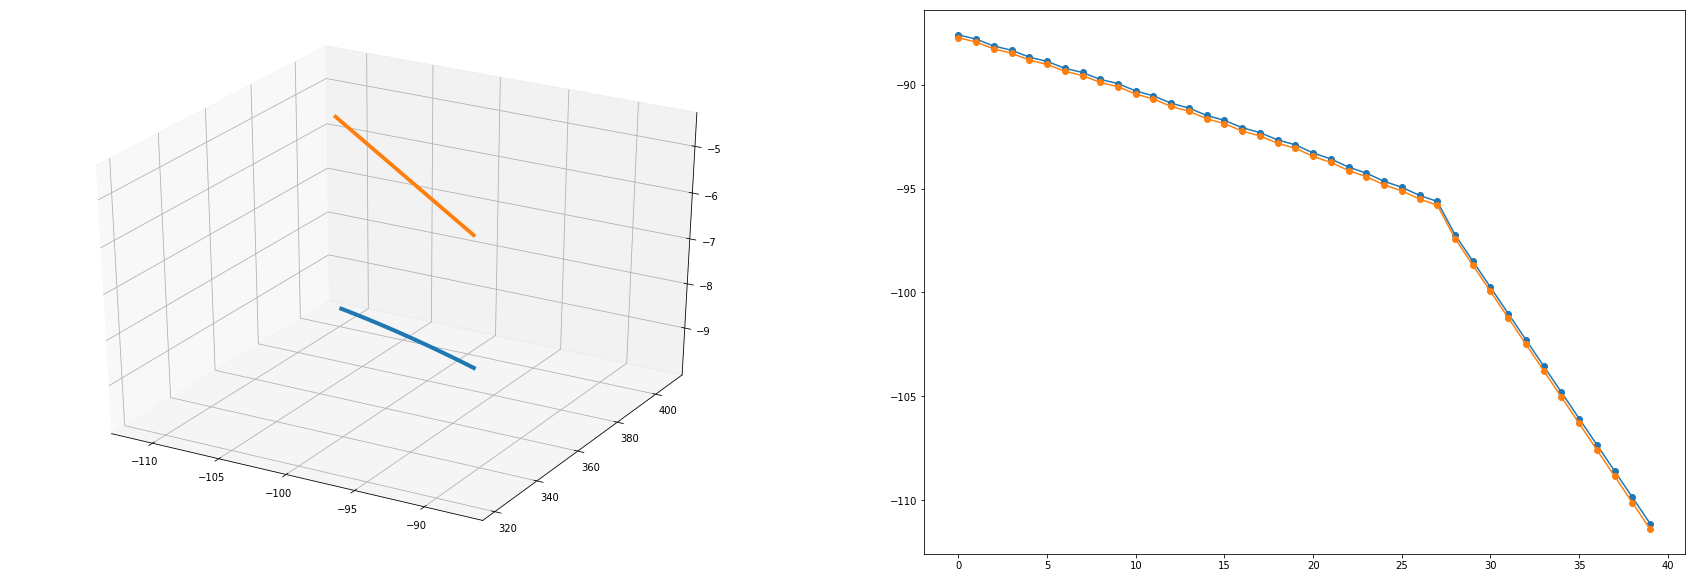

In [83]:
fig = plt.figure(figsize=(30, 10))
ax1 = plt.subplot(121, projection = '3d')
ax2 = plt.subplot(122)

for i_part in particles.index:
    
    posx = particles.loc[i_part,'posx'][min_lay:max_lay]
    posy = particles.loc[i_part,'posy'][min_lay:max_lay]
    posz = particles.loc[i_part,'posz'][min_lay:max_lay]
    ene = particles.loc[i_part,'energy']

    ax1.plot(posx,posz,posy, '-', linewidth = np.log(ene))
    #ax1.scatter(posx,posz,posy,s = enes*10)

    #plt.plot(posz,'o')
    ax2.plot(posx,'-o')

### Create hits data frame

In [84]:
all_hits = pd.DataFrame({name.replace('rechit_',''):df.loc[event_id,name] for name in branches if 'rechit_' in name })

Add multicluster index

In [85]:
cl2d_ind = df.rechit_cluster2d.loc[event_id]

In [86]:
mcl_ind = df.loc[event_id,'cluster2d_multicluster'][cl2d_ind]

Adding 3d cluster index to hits df

In [87]:
all_hits['cluster3d'] = pd.Series(mcl_ind, index=all_hits.index) 

sort columns

In [88]:
all_hits = all_hits.reindex_axis(sorted(all_hits.columns), axis=1)

In [89]:
all_hits[:5]

,cluster2d,cluster3d,energy,flags,layer,x,y,z
0,0,0,0.007053,2,15,-92.775002,-14.608273,335.095001
1,0,0,0.027156,0,15,-93.337280,-5.843304,335.095001
2,0,0,0.022571,0,15,-92.212730,-7.791073,335.095001
3,0,0,0.184799,0,15,-92.212730,-5.843304,335.095001
4,0,0,0.063481,0,15,-93.899551,-4.869427,335.095001


Select hits

In [90]:
selected_hit_ind = (all_hits.flags < 3)
selected_hit_ind &= (all_hits.layer < 59) 
selected_hit_ind &= (all_hits.z > 0) 
selected_hit_ind &= (all_hits.cluster3d < 10000)
selected_hit_ind &= (all_hits.energy > -0.01)

hits = all_hits[selected_hit_ind]

## Plot

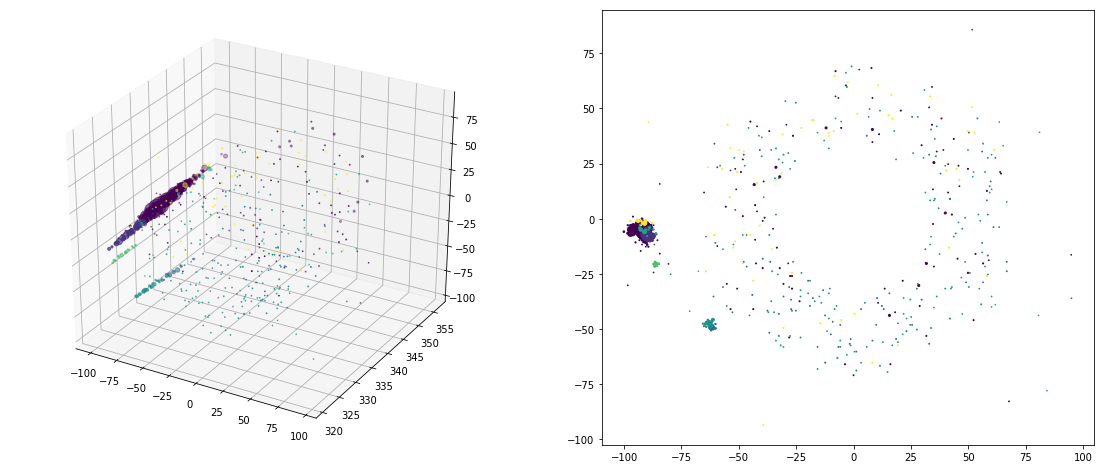

In [91]:
fig = plt.figure(figsize=(30, 8))
ax1 = plt.subplot(131, projection = '3d')
ax2 = plt.subplot(132)
#ax3 = plt.subplot(133)

ax1.scatter(hits.x,abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
ax2.scatter(hits.x,hits.y, s = hits.energy*100, c = hits.cluster3d)
#ax2.scatter(abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
#ax3.scatter(abs(hits.z),hits.x, s = hits.energy*100, c = hits.cluster3d)

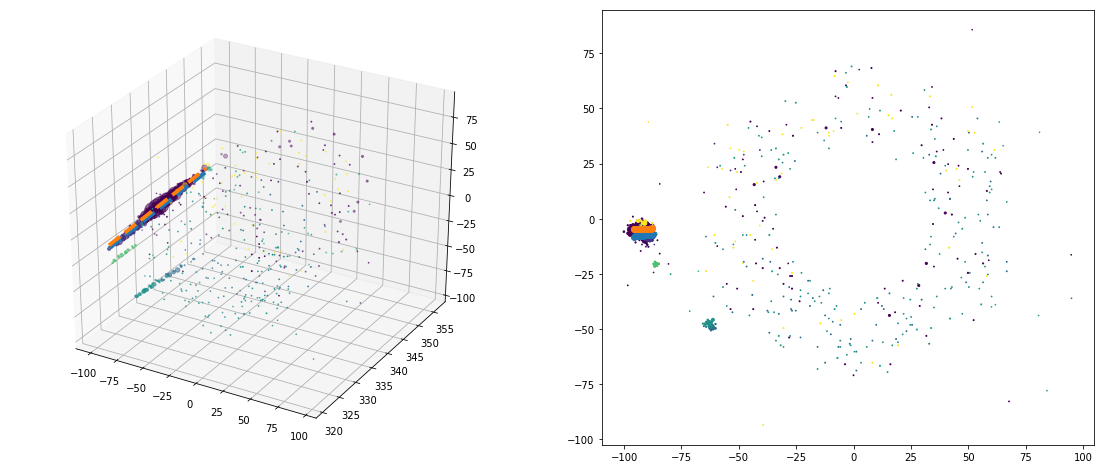

In [92]:
fig = plt.figure(figsize=(30, 8))
ax1 = plt.subplot(131, projection = '3d')
ax2 = plt.subplot(132)
#ax3 = plt.subplot(133)

ax1.scatter(hits.x,abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
ax2.scatter(hits.x,hits.y, s = hits.energy*100, c = hits.cluster3d)

max_lay = 28
for i_part in particles.index:
    
    posx = particles.loc[i_part,'posx'][min_lay:max_lay]
    posy = particles.loc[i_part,'posy'][min_lay:max_lay]
    posz = particles.loc[i_part,'posz'][min_lay:max_lay]
    ene = particles.loc[i_part,'energy']

    ax1.plot(posx,posz,posy, '--', linewidth = np.log(ene))
    #ax1.scatter(posx,posz,posy,s = enes*10)

    #plt.plot(posz,'o')
    ax2.plot(posx,posy,'o')

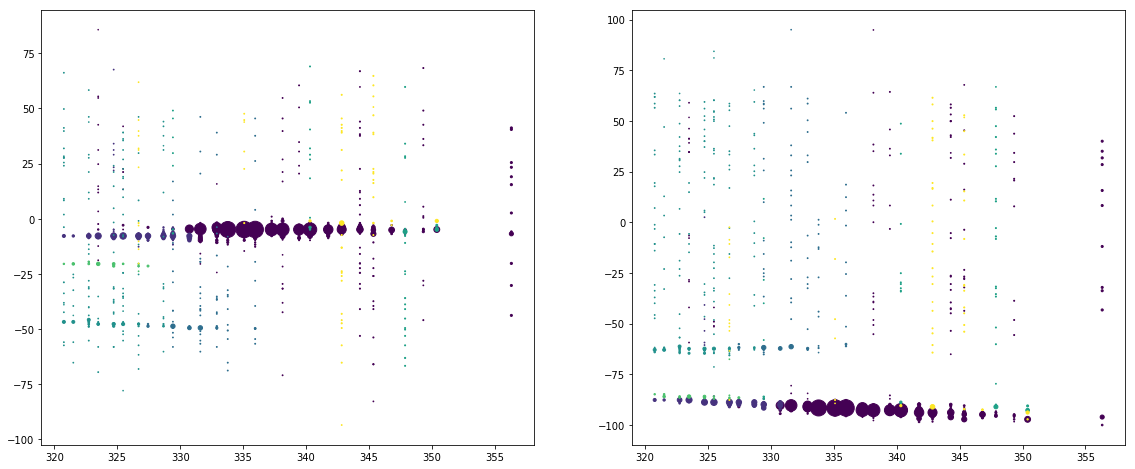

In [93]:
fig = plt.figure(figsize=(30, 8))
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax2.scatter(abs(hits.z),hits.y, s = hits.energy*100, c = hits.cluster3d)
ax3.scatter(abs(hits.z),hits.x, s = hits.energy*100, c = hits.cluster3d)
#ax3.scatter(abs(hits.z),hits.x, s = np.log10(hits.energy*1e5), c = hits.cluster3d)

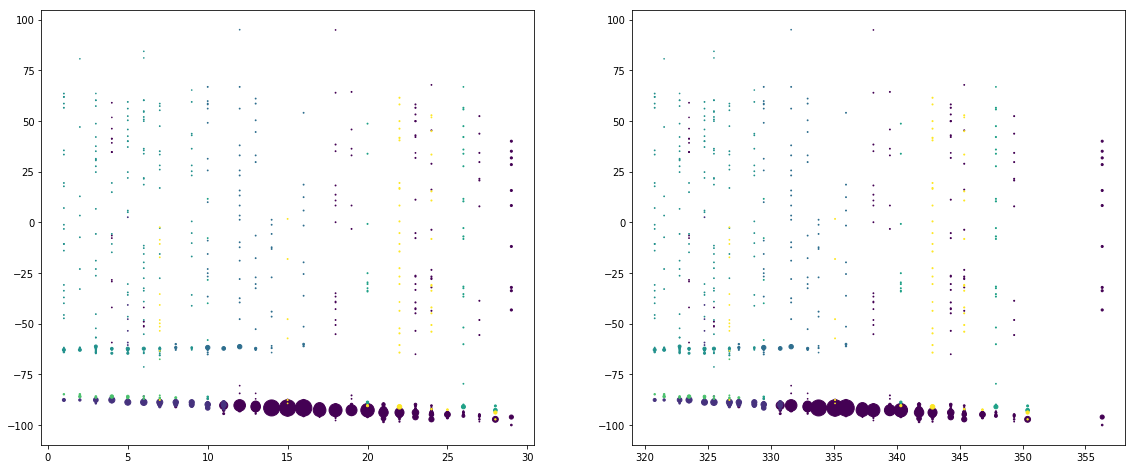

In [94]:
fig = plt.figure(figsize=(30, 8))
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax2.scatter(abs(hits.layer),hits.x, s = hits.energy*100, c = hits.cluster3d)
ax3.scatter(abs(hits.z),hits.x, s = hits.energy*100, c = hits.cluster3d)

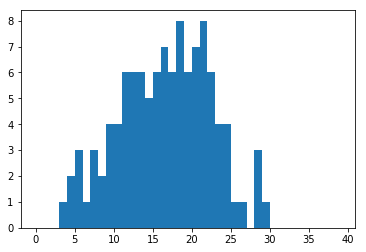

In [95]:
h = plt.hist(hits.layer[hits.energy > 0.1], bins = np.arange(40))

In [96]:
#import seaborn as sns
#sns.set()
#sns.set_style("white")
#h = plt.hist(hits.layer[hits.energy > 0.1], bins = np.arange(40))

In [97]:
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

--- 2.7567923400056316 seconds ---
